# **Author: Anmol Shinde**

# **Prediction using Unsupervised ML**


Task 2- From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

We first import the required libraries.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

After importing libraries we start with importing data.


In [6]:
data = pd.read_csv("iris.csv")
print(data.head(10))
print("Data imported successfully")
print(data.shape)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa
(150, 6)


We drop the entities that won't be required like here we drop "Id".

In [7]:
data = data.drop("Id", axis=1)
print(data.head(10))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
5            5.4           3.9            1.7           0.4  Iris-setosa
6            4.6           3.4            1.4           0.3  Iris-setosa
7            5.0           3.4            1.5           0.2  Iris-setosa
8            4.4           2.9            1.4           0.2  Iris-setosa
9            4.9           3.1            1.5           0.1  Iris-setosa


Now we gather some information about the data

In [8]:
print(data.shape)
data.info()

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


From above we get that there are no null values.
Now we start finding optimum number of clusters for **K Mean Classification** for which we use **Elbow Method**.

In [9]:
x = data.iloc[:, [0, 1, 2, 3]].values
wcss = []
n = range(1, 11)
for i in n:
    model: KMeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    model.fit(x)
    wcss.append(model.inertia_)

We plot the line graph to get the elbow point.

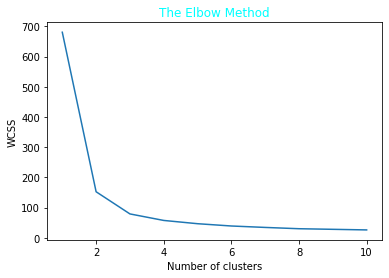

In [10]:
plt.plot(n, wcss)
plt.title("The Elbow Method", color="cyan")
plt.xlabel("Number of clusters", color="k")
plt.ylabel("WCSS", color="k")
plt.show()

We can observe in graph that we do get an elbow point.
Thus we take **3** as the **optimum number of clusters** from above graph.

# **K-MeanS Model**

In [11]:
model = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_pred = model.fit_predict(x)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


Now visualising clusters on first two columns and centroids.

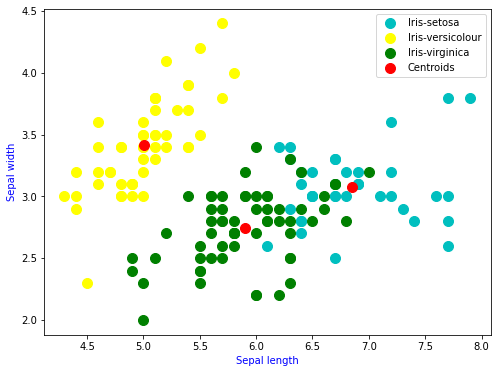

In [17]:
plt.figure(figsize=(8, 6))
plt.xlabel("Sepal length", size=10, color="b")
plt.ylabel("Sepal width", size=10, color="b")
# Plotting the clusters
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s=100, color='c', label='Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s=100, color='yellow', label='Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s=100, color='green', label='Iris-virginica')
# PLotting the Cemtroids of clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='r', label='Centroids')
plt.legend(loc="best")
plt.show()

And here visualising clusters on last two columns and centroids.

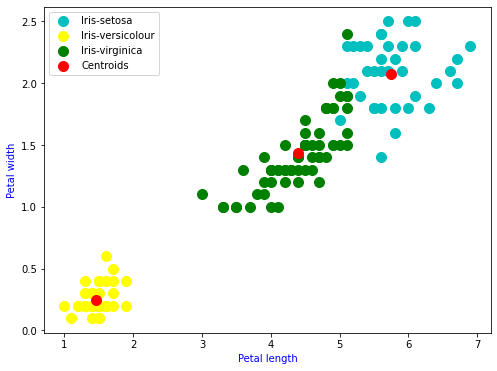

In [16]:
plt.figure(figsize=(8, 6))
plt.xlabel("Petal length", size=10, color="b")
plt.ylabel("Petal width", size=10, color="b")
# Plotting the clusters
plt.scatter(x[y_pred == 0, 2], x[y_pred == 0, 3], s=100, color='c', label='Iris-setosa')
plt.scatter(x[y_pred == 1, 2], x[y_pred == 1, 3], s=100, color='yellow', label='Iris-versicolour')
plt.scatter(x[y_pred == 2, 2], x[y_pred == 2, 3], s=100, color='green', label='Iris-virginica')
# PLotting the Cemtroids of clusters
plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:, 3], s=100, c='red', label='Centroids')
plt.legend(loc="best")
plt.show()

Thus with finding number of clusters as 3 we visualised the clusters hence completing the task.
